# COVID - 19 Confirmed Cases Data Analysis with Python - 

In [63]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

### Task 1: Checking and pruning the dataset

<b>Importing CSV file with cumulative sum of Covid-19 cases (per day per country, till August 2, 2020)</b>

In [64]:
dataset = pd.read_csv("Covid_confirmed.csv")

In [65]:
dataset.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,897,897,897,907,907,918,922,925,925,925
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,880,916,932,950,1000,1078,1109,1148,1164,1199
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,82,82,82,86,86,91,91,91,91,91
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,153520,158334,162526,167416,173355,178996,185373,191302,196543,201919
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,36613,36996,37317,37390,37629,37937,38196,38550,38841,39050
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,3654,3668,3685,3699,3718,3736,3756,3773,3784,3797


In [66]:
dataset.shape

(266, 198)

<br>  </br>
<b> Clean data </b>

In [67]:
dataset.drop(["Lat","Long"], axis = 1, inplace = True)

In [68]:
dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710
1,NaN,Albania,0,0,0,0,0,0,0,0,...,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,897,897,897,907,907,918,922,925,925,925
4,NaN,Angola,0,0,0,0,0,0,0,0,...,880,916,932,950,1000,1078,1109,1148,1164,1199


In [69]:
df_aggregate = dataset.groupby("Country/Region").sum()

In [70]:
df_aggregate.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710
Albania,0,0,0,0,0,0,0,0,0,0,...,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519
Algeria,0,0,0,0,0,0,0,0,0,0,...,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465
Andorra,0,0,0,0,0,0,0,0,0,0,...,897,897,897,907,907,918,922,925,925,925
Angola,0,0,0,0,0,0,0,0,0,0,...,880,916,932,950,1000,1078,1109,1148,1164,1199
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,82,82,82,86,86,91,91,91,91,91
Argentina,0,0,0,0,0,0,0,0,0,0,...,153520,158334,162526,167416,173355,178996,185373,191302,196543,201919
Armenia,0,0,0,0,0,0,0,0,0,0,...,36613,36996,37317,37390,37629,37937,38196,38550,38841,39050
Australia,0,0,0,0,4,5,5,6,9,9,...,13950,14403,14935,15303,15582,16298,16903,17280,17895,18318


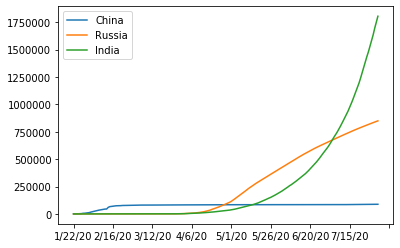

In [71]:
df_aggregate.loc["China"].plot()
df_aggregate.loc["Russia"].plot()
df_aggregate.loc["India"].plot()
plt.legend()

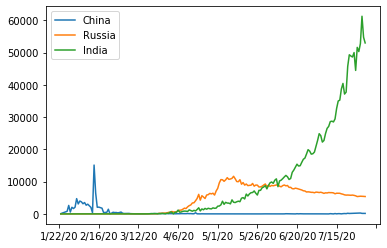

In [72]:
df_aggregate.loc["China"].diff().plot()
df_aggregate.loc["Russia"].diff().plot()
df_aggregate.loc["India"].diff().plot()
plt.legend()

###  Task 2: Find a measure for correlation of data

In [73]:
countries = list(df_aggregate.index)
max_increase_rate = []
for country in countries:
    max_increase_rate.append(df_aggregate.loc[country].diff().max())
max_increase_rate

[915.0,
 126.0,
 675.0,
 79.0,
 78.0,
 39.0,
 6377.0,
 771.0,
 716.0,
 1321.0,
 590.0,
 66.0,
 786.0,
 4019.0,
 12.0,
 973.0,
 2454.0,
 8.0,
 139.0,
 11.0,
 2036.0,
 731.0,
 123.0,
 69074.0,
 26.0,
 330.0,
 41.0,
 24.0,
 78.0,
 114.0,
 31.0,
 2324.0,
 2778.0,
 216.0,
 83.0,
 13990.0,
 15136.0,
 11470.0,
 44.0,
 295.0,
 414.0,
 931.0,
 430.0,
 140.0,
 74.0,
 58.0,
 381.0,
 391.0,
 99.0,
 280.0,
 5.0,
 2012.0,
 11536.0,
 1774.0,
 429.0,
 1750.0,
 31.0,
 134.0,
 147.0,
 928.0,
 5.0,
 267.0,
 26849.0,
 570.0,
 95.0,
 42.0,
 6933.0,
 1513.0,
 156.0,
 6.0,
 4233.0,
 278.0,
 156.0,
 44.0,
 332.0,
 3.0,
 1075.0,
 210.0,
 99.0,
 61242.0,
 2657.0,
 3574.0,
 3346.0,
 1515.0,
 2308.0,
 6557.0,
 52.0,
 1762.0,
 40.0,
 18757.0,
 960.0,
 851.0,
 695.0,
 1073.0,
 11505.0,
 3.0,
 48.0,
 221.0,
 98.0,
 45.0,
 216.0,
 21.0,
 90.0,
 234.0,
 7.0,
 614.0,
 257.0,
 277.0,
 215.0,
 81.0,
 94.0,
 227.0,
 41.0,
 9556.0,
 478.0,
 12.0,
 56.0,
 678.0,
 1063.0,
 62.0,
 125.0,
 740.0,
 1346.0,
 89.0,
 480.0,
 69.0,

In [74]:
df_aggregate["Max Increase Rate"] = max_increase_rate

In [75]:
country_infected = pd.DataFrame(df_aggregate["Max Increase Rate"])

In [76]:
country_infected.head()

,Max Increase Rate
Country/Region,
Afghanistan,915.0
Albania,126.0
Algeria,675.0
Andorra,79.0
Angola,78.0


### Task 3: Finding correlation of Corona-infected data with country-based factors

In [77]:
happy_csv = pd.read_csv("worldwide_happiness_report.csv")

In [78]:
happy_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [79]:
useless_columns = ["Overall rank","Score","Generosity","Perceptions of corruption"]
happy_csv.drop(useless_columns, axis = 1, inplace = True)

In [80]:
happy_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [81]:
happy_csv.set_index("Country or region", inplace = True)

In [82]:
happy_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [83]:
final_data = country_infected.join(happy_csv, how="inner")
final_data.head()

,Max Increase Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,126.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,6377.0,1.092,1.432,0.881,0.471
Armenia,771.0,0.850,1.055,0.815,0.283


In [84]:
final_data.corr()

,Max Increase Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max Increase Rate,1.000000,0.104977,0.074857,0.093151,0.085983
GDP per capita,0.104977,1.000000,0.757521,0.859431,0.394799
Social support,0.074857,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.093151,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.085983,0.394799,0.456317,0.423146,1.000000


### Task 4: Visualisation of results

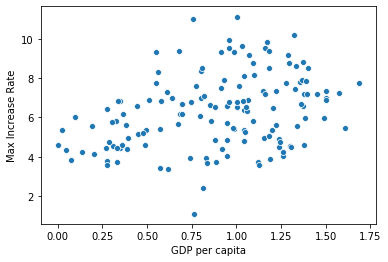

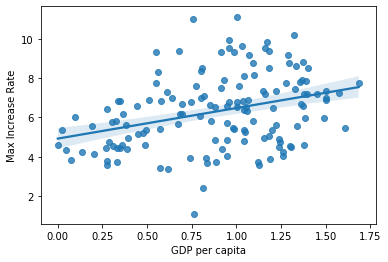

In [96]:
x = final_data["GDP per capita"]
y = final_data["Max Increase Rate"]
sns.scatterplot(x,np.log(y))
plt.show()
sns.regplot(x,np.log(y))

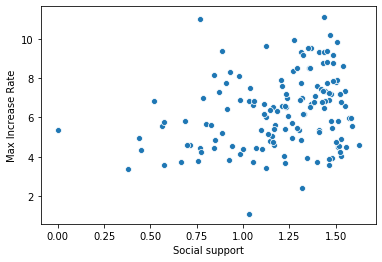

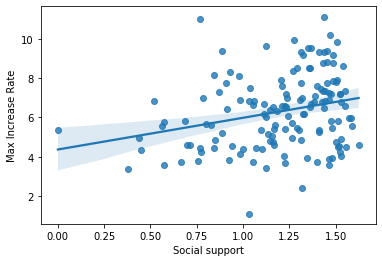

In [97]:
x = final_data["Social support"]
y = final_data["Max Increase Rate"]
sns.scatterplot(x,np.log(y))
plt.show()
sns.regplot(x,np.log(y))

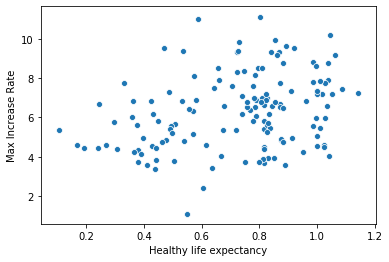

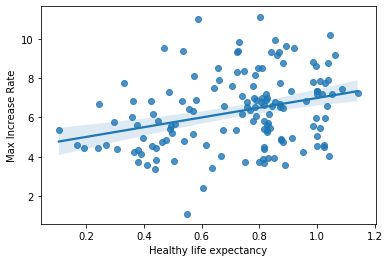

In [98]:
x = final_data["Healthy life expectancy"]
y = final_data["Max Increase Rate"]
sns.scatterplot(x,np.log(y))
plt.show()
sns.regplot(x,np.log(y))

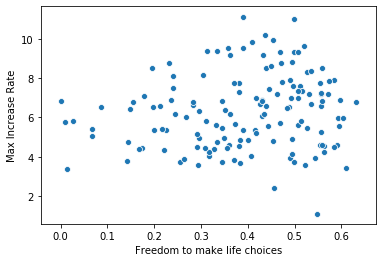

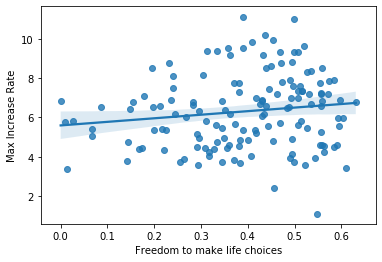

In [99]:
x = final_data["Freedom to make life choices"]
y = final_data["Max Increase Rate"]
sns.scatterplot(x,np.log(y))
plt.show()
sns.regplot(x,np.log(y))

### Thank you!